Step 1: Importing Python libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Importing Customed Stock Dataset

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data As of 9.13.24/'
stocks = pd.read_csv(os.path.join(path, 'Stock Data/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns = 'Unnamed: 0', inplace = True)
stocks

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
0,2014-09-15,Amazon,79996340,16.1945,16.5455,16.5665,16.5665,NaN,NaN
1,2014-09-16,Amazon,65194220,16.3880,16.0535,16.4740,16.4740,NaN,NaN
2,2014-09-17,Amazon,82718520,16.2000,16.3880,16.4000,16.4000,NaN,NaN
3,2014-09-18,Amazon,51525880,16.2500,16.2720,16.3550,16.3550,NaN,NaN
4,2014-09-19,Amazon,137723240,16.5660,16.3800,16.6378,16.6378,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15097,2024-09-09,Tesla,67443520,216.2700,216.2000,219.8700,213.6700,199.148142,214.373616
15098,2024-09-10,Tesla,78891140,226.1700,220.0700,226.4000,218.6377,198.998798,214.474932
15099,2024-09-11,Tesla,83548630,228.1300,224.5500,228.4700,216.8003,198.867923,214.568767
15100,2024-09-12,Tesla,72020040,229.8100,224.6600,231.4500,223.8300,198.718142,214.663370


Step 3: Descriptive Stats

In [3]:
stocks.describe()

,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
count,1.510200e+04,15102.000000,15102.000000,15102.000000,15102.000000,14010.000000,12918.000000
mean,6.218104e+07,164.932340,164.891852,167.141696,163.301610,162.304019,161.182704
std,6.339542e+07,136.957821,136.961113,138.839367,134.855487,126.498620,119.119027
min,1.143952e+06,9.578000,9.488000,10.331300,9.403300,14.051845,14.458877
25%,1.848042e+07,52.198750,52.265000,52.835000,52.096250,54.728469,59.350936
50%,4.283434e+07,135.613350,135.785000,137.330000,135.345000,138.536288,139.350874
75%,8.626103e+07,227.865000,227.972475,232.342500,224.549950,231.840366,234.425106
max,9.140809e+08,701.350000,700.360000,711.330000,691.380000,610.401694,542.559205


In [4]:
stocks.groupby('Stock_Name').describe().transpose()

Stock_Name                   Amazon         Apple          Meta     Microsoft  \
Volume          count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   7.725108e+07  1.216528e+08  2.345579e+07  2.920282e+07   
                std    4.056725e+07  6.952824e+07  1.507759e+07  1.372597e+07   
                min    1.762674e+07  2.404834e+07  5.467488e+06  7.425603e+06   
                25%    5.179556e+07  7.452616e+07  1.479711e+07  2.093516e+07   
                50%    6.637534e+07  1.036255e+08  1.959942e+07  2.610348e+07   
                75%    9.059192e+07  1.483229e+08  2.713070e+07  3.345933e+07   
                max    4.769344e+08  6.475300e+08  2.323166e+08  2.025141e+08   
Close/Last in $ count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.563589e+01  9.016013e+01  2.071118e+02  1.763233e+02   
                std    5.301815e+01  6.159929e+01  1.064354e+02  1.177099e+02   
                min    1.434750e+01  2.258500e+01  7.263000e+01  4.029000e+01   
                25%    4.262650e+01  3.496000e+01  1.290700e+02  6.493000e+01   
                50%    9.220350e+01  5.599250e+01  1.793800e+02  1.381200e+02   
                75%    1.470300e+02  1.486000e+02  2.675700e+02  2.684000e+02   
                max    2.000000e+02  2.348200e+02  5.399100e+02  4.675600e+02   
Open in $       count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.566333e+01  9.009049e+01  2.069936e+02  1.762727e+02   
                std    5.305715e+01  6.155093e+01  1.064040e+02  1.176953e+02   
                min    1.422000e+01  2.250000e+01  7.079000e+01  4.034000e+01   
                25%    4.265250e+01  3.485250e+01  1.290100e+02  6.491000e+01   
                50%    9.213950e+01  5.619750e+01  1.791500e+02  1.386100e+02   
                75%    1.467485e+02  1.483100e+02  2.686400e+02  2.676400e+02   
                max    2.000900e+02  2.364800e+02  5.423500e+02  4.670000e+02   
High in $       count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.675724e+01  9.105898e+01  2.096682e+02  1.779696e+02   
                std    5.367723e+01  6.221170e+01  1.078155e+02  1.187585e+02   
                min    1.452100e+01  2.291750e+01  7.335000e+01  4.074000e+01   
                25%    4.277500e+01  3.518750e+01  1.301200e+02  6.522000e+01   
                50%    9.325000e+01  5.661000e+01  1.808000e+02  1.395400e+02   
                75%    1.486743e+02  1.498300e+02  2.716100e+02  2.716500e+02   
                max    2.012000e+02  2.372300e+02  5.442300e+02  4.683500e+02   
Low in $        count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.675724e+01  9.105898e+01  2.044307e+02  1.744992e+02   
                std    5.367723e+01  6.221170e+01  1.050319e+02  1.165329e+02   
                min    1.452100e+01  2.291750e+01  7.032000e+01  3.972000e+01   
                25%    4.277500e+01  3.518750e+01  1.278300e+02  6.448000e+01   
                50%    9.325000e+01  5.661000e+01  1.773600e+02  1.368850e+02   
                75%    1.486743e+02  1.498300e+02  2.647800e+02  2.650700e+02   
                max    2.012000e+02  2.372300e+02  5.285900e+02  4.644600e+02   
MA_Six_Months   count  2.335000e+03  2.335000e+03  2.335000e+03  2.335000e+03   
                mean   9.541443e+01  8.812765e+01  2.009863e+02  1.718028e+02   
                std    4.860277e+01  5.759361e+01  8.487329e+01  1.075041e+02   
                min    1.755845e+01  2.526232e+01  7.825423e+01  4.463328e+01   
                25%    4.632580e+01  3.636541e+01  1.465427e+02  6.868883e+01   
                50%    9.150313e+01  5.772490e+01  1.782128e+02  1.412268e+02   
                75%    1.399971e+02  1.501330e+02  2.574757e+02  2.656170e+02   
                max    1.763215e+02  1.957039e+02  4.741322e+02  4.161232e+02   
MA_One_Year     count  2.153000

Step 4: Prepping for Visualizations

In [5]:
# Grabbing today's date
max_date = max(stocks['Date'])
max_date

'2024-09-13'

In [6]:
# Filtering the dataset by using today's date
stocks_max_date = stocks[stocks['Date']==max_date]
stocks_max_date

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
2516,2024-09-13,Amazon,26495350,186.49,187.000,188.500,188.50,176.321503,152.604329
5033,2024-09-13,Apple,36766620,222.50,223.580,224.040,224.04,195.703880,188.061068
7550,2024-09-13,Meta,10321420,524.62,520.340,527.581,517.11,474.132240,382.002863
10067,2024-09-13,Microsoft,15874560,430.59,425.825,431.830,425.46,416.123169,374.178534
12584,2024-09-13,Netflix,2276482,697.06,680.010,699.640,680.00,610.401694,509.065288
15101,2024-09-13,Tesla,59515110,230.29,228.000,232.670,226.32,198.626066,214.725918


Text(0.5, 1.0, 'Shares Traded per Stock For Today')

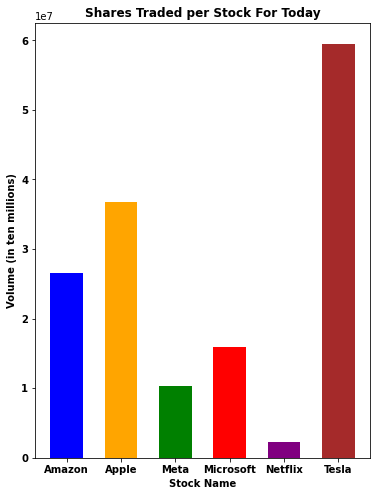

In [7]:
shares_volume = plt.figure(figsize=(6,8))
colors = ['blue','orange','green','red','purple','brown']
plt.bar(stocks_max_date['Stock_Name'], stocks_max_date['Volume'],
        color = colors, width = 0.6),
plt.xlabel('Stock Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('Volume (in ten millions)', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, rotation = 0, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.title('Shares Traded per Stock For Today', fontsize = 12, fontweight = 'bold')

In [8]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks.set_index('Date')
stocks

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2014-09-15,Amazon,79996340,16.1945,16.5455,16.5665,16.5665,NaN,NaN
2014-09-16,Amazon,65194220,16.3880,16.0535,16.4740,16.4740,NaN,NaN
2014-09-17,Amazon,82718520,16.2000,16.3880,16.4000,16.4000,NaN,NaN
2014-09-18,Amazon,51525880,16.2500,16.2720,16.3550,16.3550,NaN,NaN
2014-09-19,Amazon,137723240,16.5660,16.3800,16.6378,16.6378,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-09-09,Tesla,67443520,216.2700,216.2000,219.8700,213.6700,199.148142,214.373616
2024-09-10,Tesla,78891140,226.1700,220.0700,226.4000,218.6377,198.998798,214.474932
2024-09-11,Tesla,83548630,228.1300,224.5500,228.4700,216.8003,198.867923,214.568767


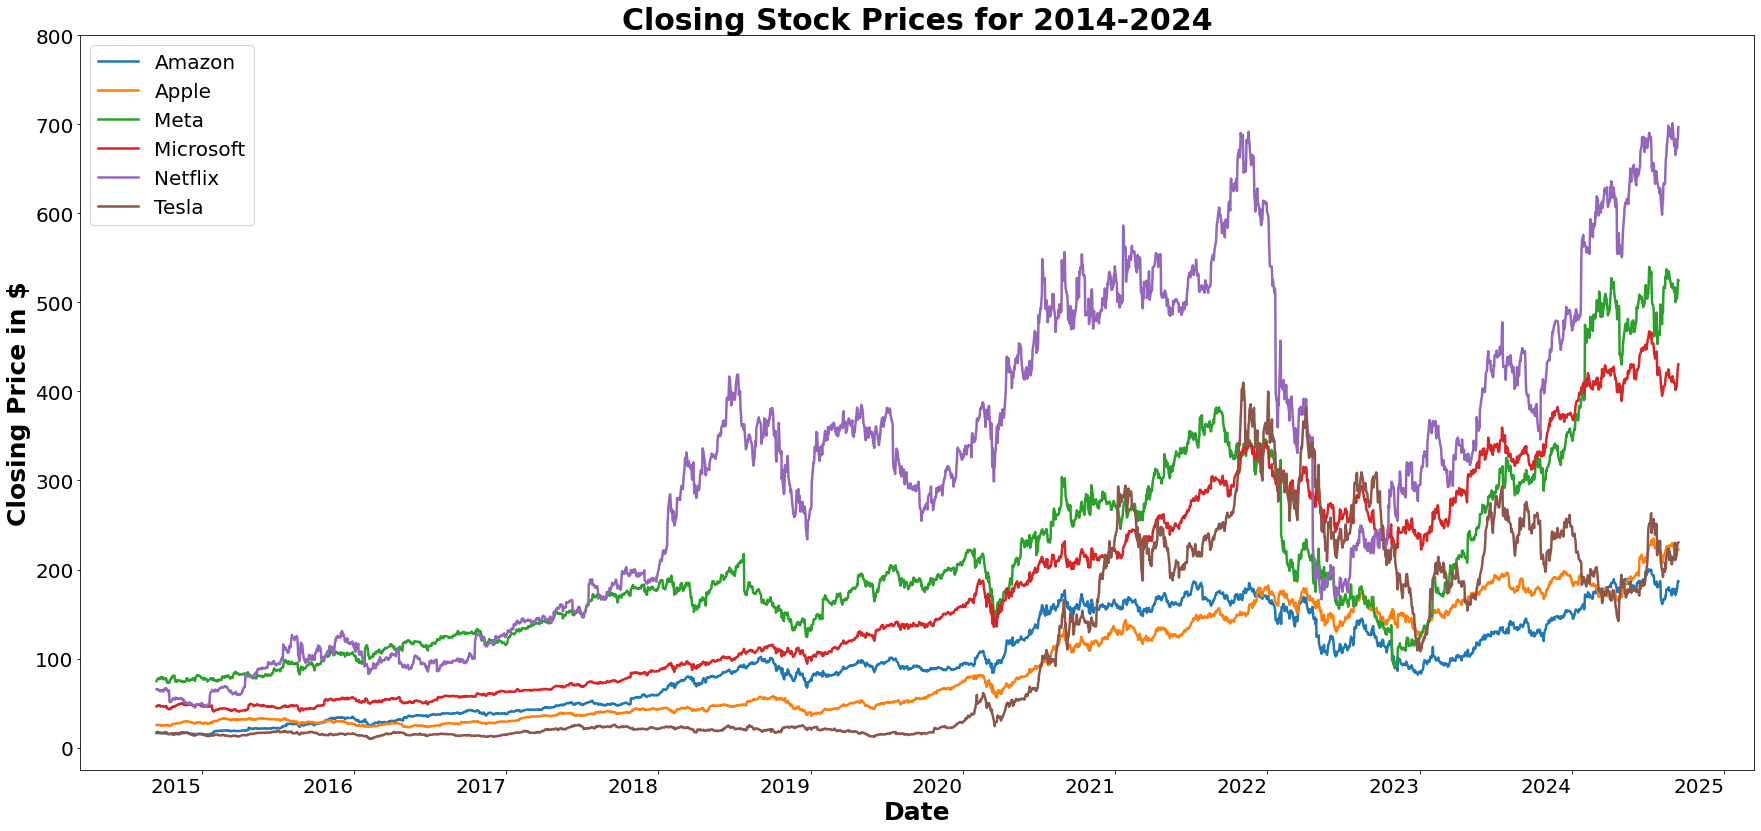

In [9]:
#Using a line chart to graph closing price of stocks within a 10 year frame
six_stocks_ten_years = plt.figure(figsize=(30,15))
stocks.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5)
plt.title('Closing Stock Prices for 2014-2024', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 900, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [10]:
# Breaking dataset into multiple where each one is assigned to one specific stock, prepping for moving average analysis

In [11]:
moving_average = stocks[stocks['MA_One_Year'].notna()]
moving_average

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-02-25,Amazon,90437740,27.7575,27.7760,27.9695,27.9695,27.709888,22.637694
2016-02-26,Amazon,97405600,27.7615,28.0060,28.1250,28.1250,27.744937,22.669384
2016-02-29,Amazon,82809300,27.6260,27.7000,28.2405,28.2405,27.780189,22.700173
2016-03-01,Amazon,100493080,28.9520,27.8145,28.9625,28.9625,27.822145,22.735110
2016-03-02,Amazon,91589220,29.0105,29.0875,29.2500,29.2500,27.862975,22.770071
...,...,...,...,...,...,...,...,...
2024-09-09,Tesla,67443520,216.2700,216.2000,219.8700,213.6700,199.148142,214.373616
2024-09-10,Tesla,78891140,226.1700,220.0700,226.4000,218.6377,198.998798,214.474932
2024-09-11,Tesla,83548630,228.1300,224.5500,228.4700,216.8003,198.867923,214.568767


In [12]:
moving_average_amazon_stock = moving_average[moving_average['Stock_Name']=='Amazon']
moving_average_amazon_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-02-25,Amazon,90437740,27.7575,27.7760,27.9695,27.9695,27.709888,22.637694
2016-02-26,Amazon,97405600,27.7615,28.0060,28.1250,28.1250,27.744937,22.669384
2016-02-29,Amazon,82809300,27.6260,27.7000,28.2405,28.2405,27.780189,22.700173
2016-03-01,Amazon,100493080,28.9520,27.8145,28.9625,28.9625,27.822145,22.735110
2016-03-02,Amazon,91589220,29.0105,29.0875,29.2500,29.2500,27.862975,22.770071
...,...,...,...,...,...,...,...,...
2024-09-09,Amazon,29037360,175.4000,174.5300,175.8500,175.8500,175.624180,151.687123
2024-09-10,Amazon,36233800,179.5500,177.4900,180.5000,180.5000,175.785820,151.912630
2024-09-11,Amazon,42564700,184.5200,180.0950,184.9900,184.9900,175.952213,152.143507


In [13]:
moving_average_apple_stock = moving_average[moving_average['Stock_Name']=='Apple']
moving_average_apple_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-02-25,Apple,110104160,24.1900,24.0125,24.1900,24.1900,28.286639,28.779328
2016-02-26,Apple,115799040,24.2275,24.3000,24.5059,24.5059,28.243278,28.776096
2016-02-29,Apple,140525840,24.1725,24.2150,24.5575,24.5575,28.200778,28.773239
2016-03-01,Apple,201214000,25.1325,24.4125,25.1925,25.1925,28.164043,28.772520
2016-03-02,Apple,132544520,25.1875,25.1275,25.2225,25.2225,28.125614,28.771808
...,...,...,...,...,...,...,...,...
2024-09-09,Apple,67179970,220.9100,220.8200,221.2700,221.2700,195.142077,187.397068
2024-09-10,Apple,51591030,220.1100,218.9200,221.4800,221.4800,195.265246,187.568192
2024-09-11,Apple,44587070,222.6600,221.4550,223.0900,223.0900,195.411530,187.737753


In [14]:
moving_average_meta_stock = moving_average[moving_average['Stock_Name']=='Meta']
moving_average_meta_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-02-25,Meta,29862100,108.07,107.11,108.0700,105.6100,96.932514,87.608315
2016-02-26,Meta,26658020,107.92,108.70,109.4500,107.1600,97.073388,87.699658
2016-02-29,Meta,32739960,106.92,107.60,108.9101,106.7500,97.216831,87.784151
2016-03-01,Meta,26743550,109.82,107.83,109.8200,107.6000,97.376120,87.875630
2016-03-02,Meta,25656490,109.95,109.68,110.5500,108.7700,97.527978,87.965904
...,...,...,...,...,...,...,...,...
2024-09-09,Meta,11047830,504.79,506.16,511.3300,502.0800,470.374536,378.602781
2024-09-10,Meta,9899022,504.79,508.16,514.1800,500.0278,471.302787,379.435959
2024-09-11,Meta,10782530,511.83,507.01,513.1200,495.6000,472.216503,380.275630


In [15]:
moving_average_microsoft_stock = moving_average[moving_average['Stock_Name']=='Microsoft']
moving_average_microsoft_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-02-25,Microsoft,26906570,52.10,51.730,52.1000,50.6100,49.107350,47.278630
2016-02-26,Microsoft,35945290,51.30,52.600,52.6800,51.1000,49.135546,47.292493
2016-02-29,Microsoft,31632160,50.88,51.350,51.6500,50.6600,49.163689,47.303781
2016-03-01,Microsoft,32999880,52.58,50.970,52.5900,50.9199,49.201557,47.320384
2016-03-02,Microsoft,29269240,52.95,52.410,52.9600,52.1550,49.236202,47.337562
...,...,...,...,...,...,...,...,...
2024-09-09,Microsoft,15295130,405.72,407.240,408.6500,402.1500,414.988907,372.625822
2024-09-10,Microsoft,19594290,414.20,408.200,416.3300,407.7000,415.226448,373.006562
2024-09-11,Microsoft,19266920,423.04,415.500,423.9900,409.5800,415.501803,373.397055


In [16]:
moving_average_netflix_stock = moving_average[moving_average['Stock_Name']=='Netflix']
moving_average_netflix_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-02-25,Netflix,17878630,94.53,91.08,94.8100,90.210,106.527068,84.883001
2016-02-26,Netflix,16951480,94.79,95.30,97.4800,94.250,106.550730,84.963541
2016-02-29,Netflix,13649060,93.41,94.81,97.2000,93.340,106.571526,85.040629
2016-03-01,Netflix,17011470,98.30,94.58,99.1600,93.610,106.603493,85.132046
2016-03-02,Netflix,19094740,97.61,98.01,99.4800,95.900,106.612993,85.219819
...,...,...,...,...,...,...,...,...
2024-09-09,Netflix,2683111,675.42,674.00,683.5000,672.140,606.049344,505.231068
2024-09-10,Netflix,2079182,673.62,676.87,680.5899,665.805,607.150765,506.190247
2024-09-11,Netflix,2391924,681.47,677.46,682.9700,660.800,608.218251,507.147616


In [17]:
moving_average_tesla_stock = moving_average[moving_average['Stock_Name']=='Tesla']
moving_average_tesla_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-02-25,Tesla,85905077,12.4953,11.9100,12.5680,11.6800,15.386507,15.142133
2016-02-26,Tesla,90810870,12.6893,12.5800,12.8000,12.3333,15.365086,15.130531
2016-02-29,Tesla,67430996,12.7953,12.8267,13.0900,12.6148,15.341639,15.117963
2016-03-01,Tesla,100435510,12.4233,12.9500,13.0632,12.1800,15.316266,15.104259
2016-03-02,Tesla,72879429,12.5560,12.2487,12.5680,12.1000,15.293548,15.090472
...,...,...,...,...,...,...,...,...
2024-09-09,Tesla,67443520,216.2700,216.2000,219.8700,213.6700,199.148142,214.373616
2024-09-10,Tesla,78891140,226.1700,220.0700,226.4000,218.6377,198.998798,214.474932
2024-09-11,Tesla,83548630,228.1300,224.5500,228.4700,216.8003,198.867923,214.568767


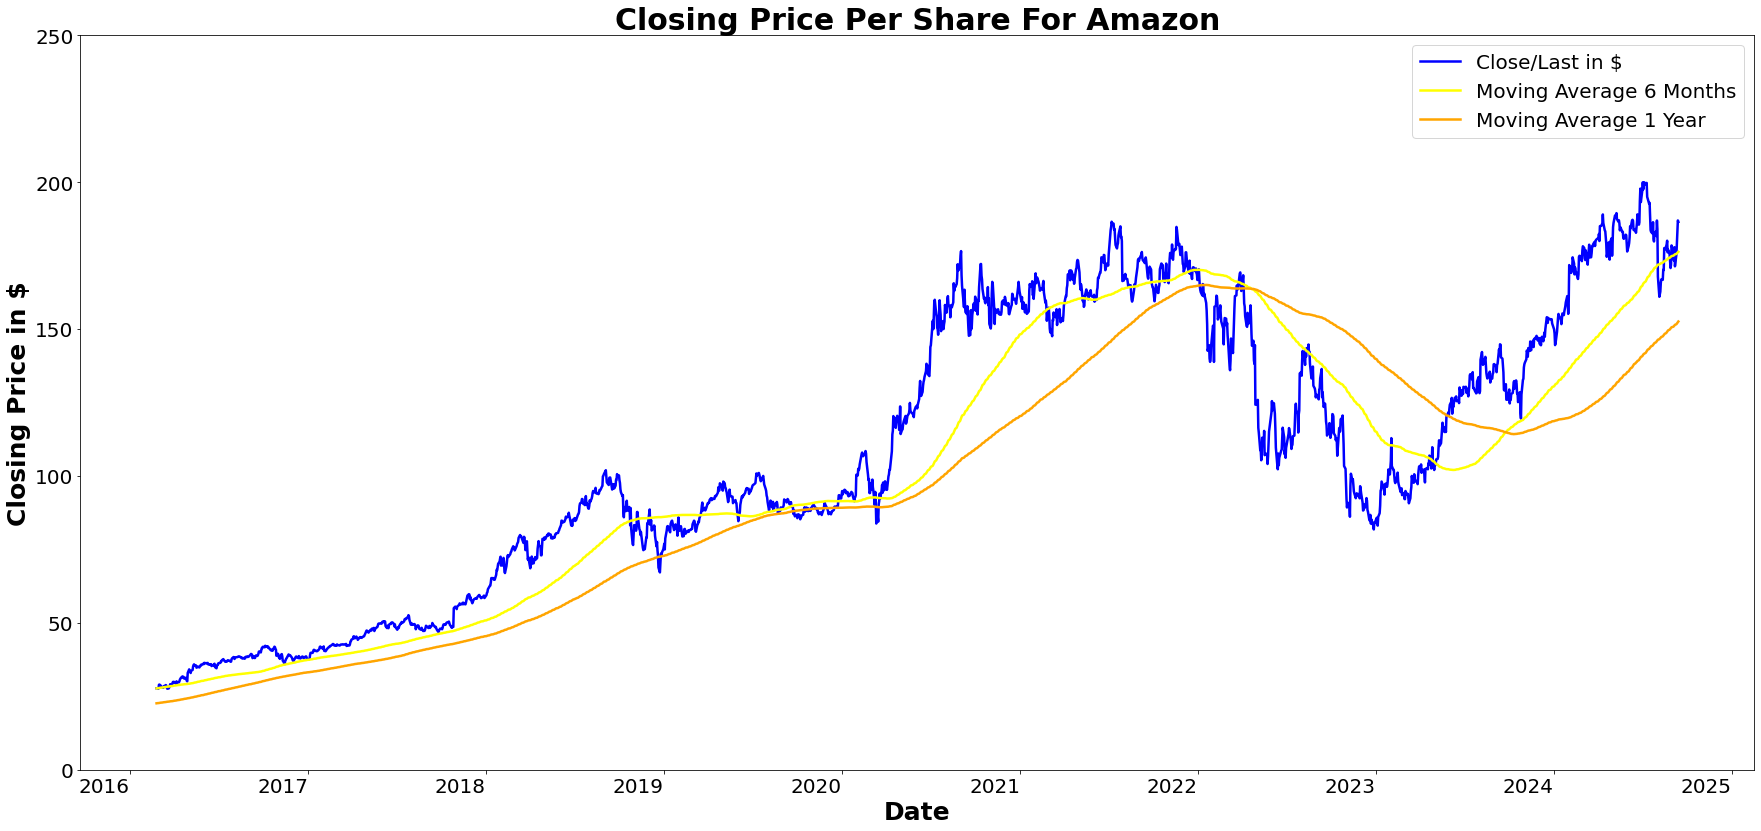

In [18]:
#Using a line chart to graph one year and five year moving averages for all stocks
amazon = plt.figure(figsize=(30,15))
moving_average_amazon_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_amazon_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_amazon_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Amazon', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

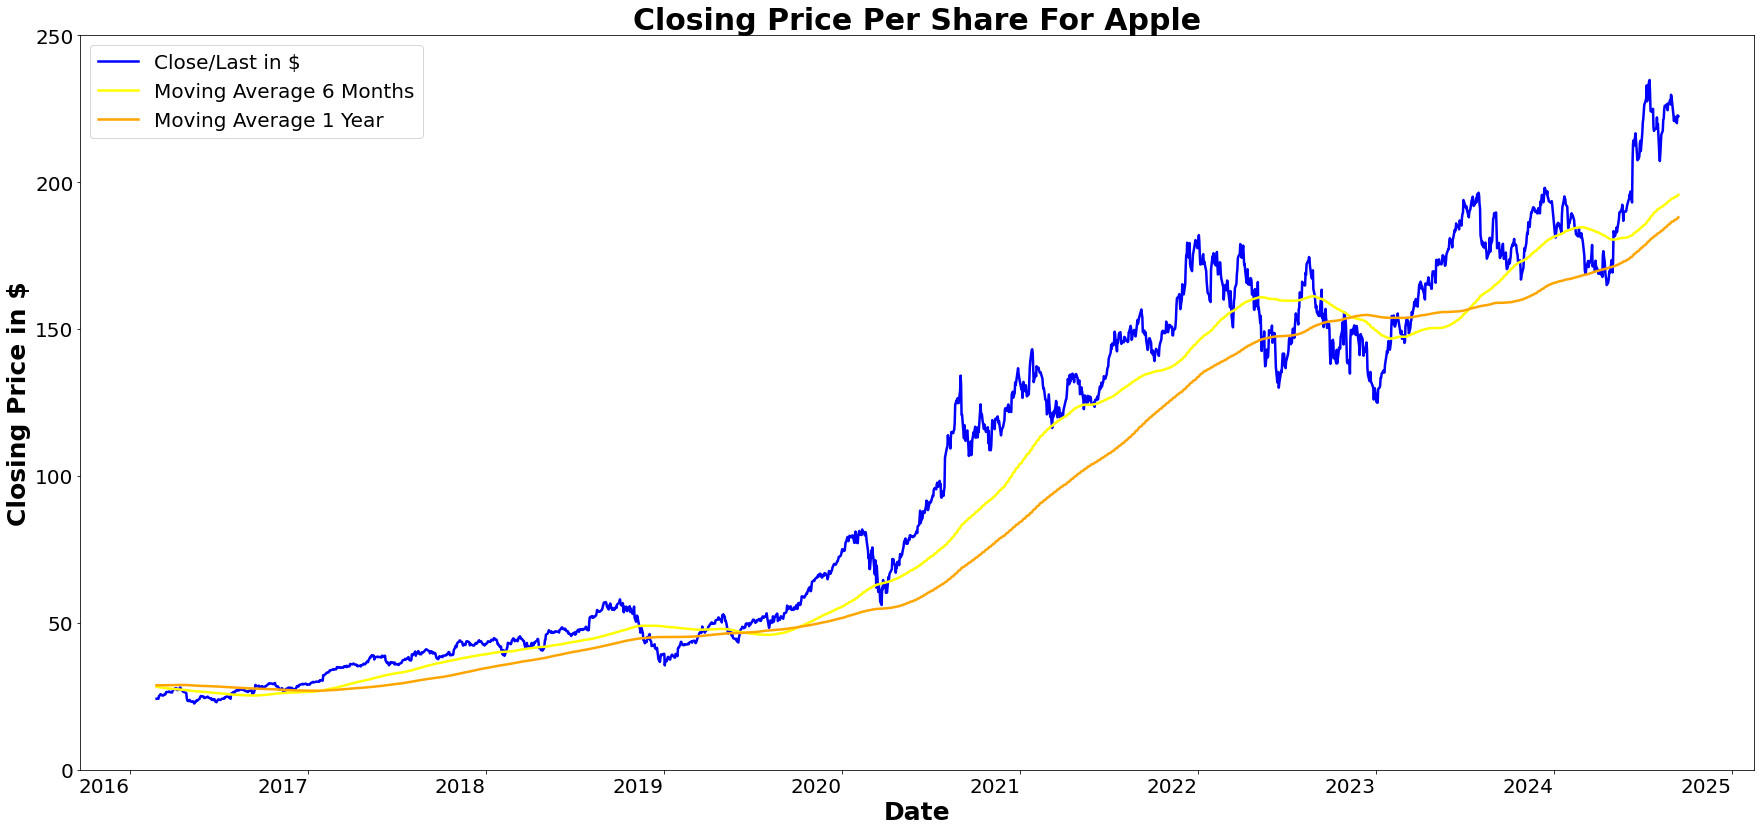

In [19]:
apple = plt.figure(figsize=(30,15))
moving_average_apple_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_apple_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_apple_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Apple', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

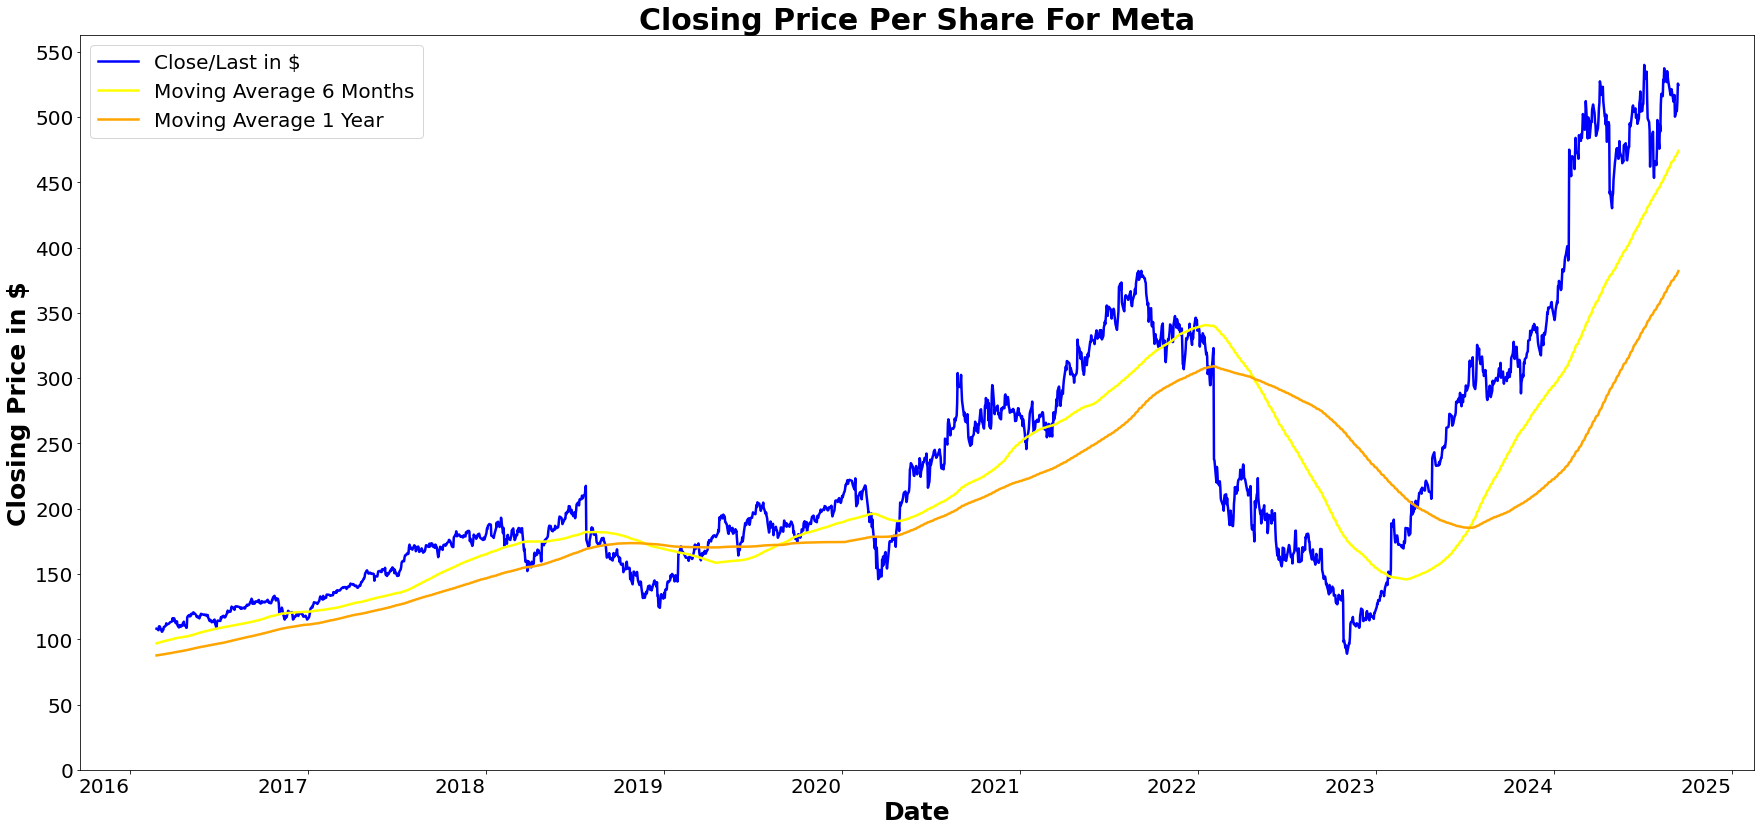

In [20]:
meta = plt.figure(figsize=(30,15))
moving_average_meta_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_meta_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_meta_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Meta', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

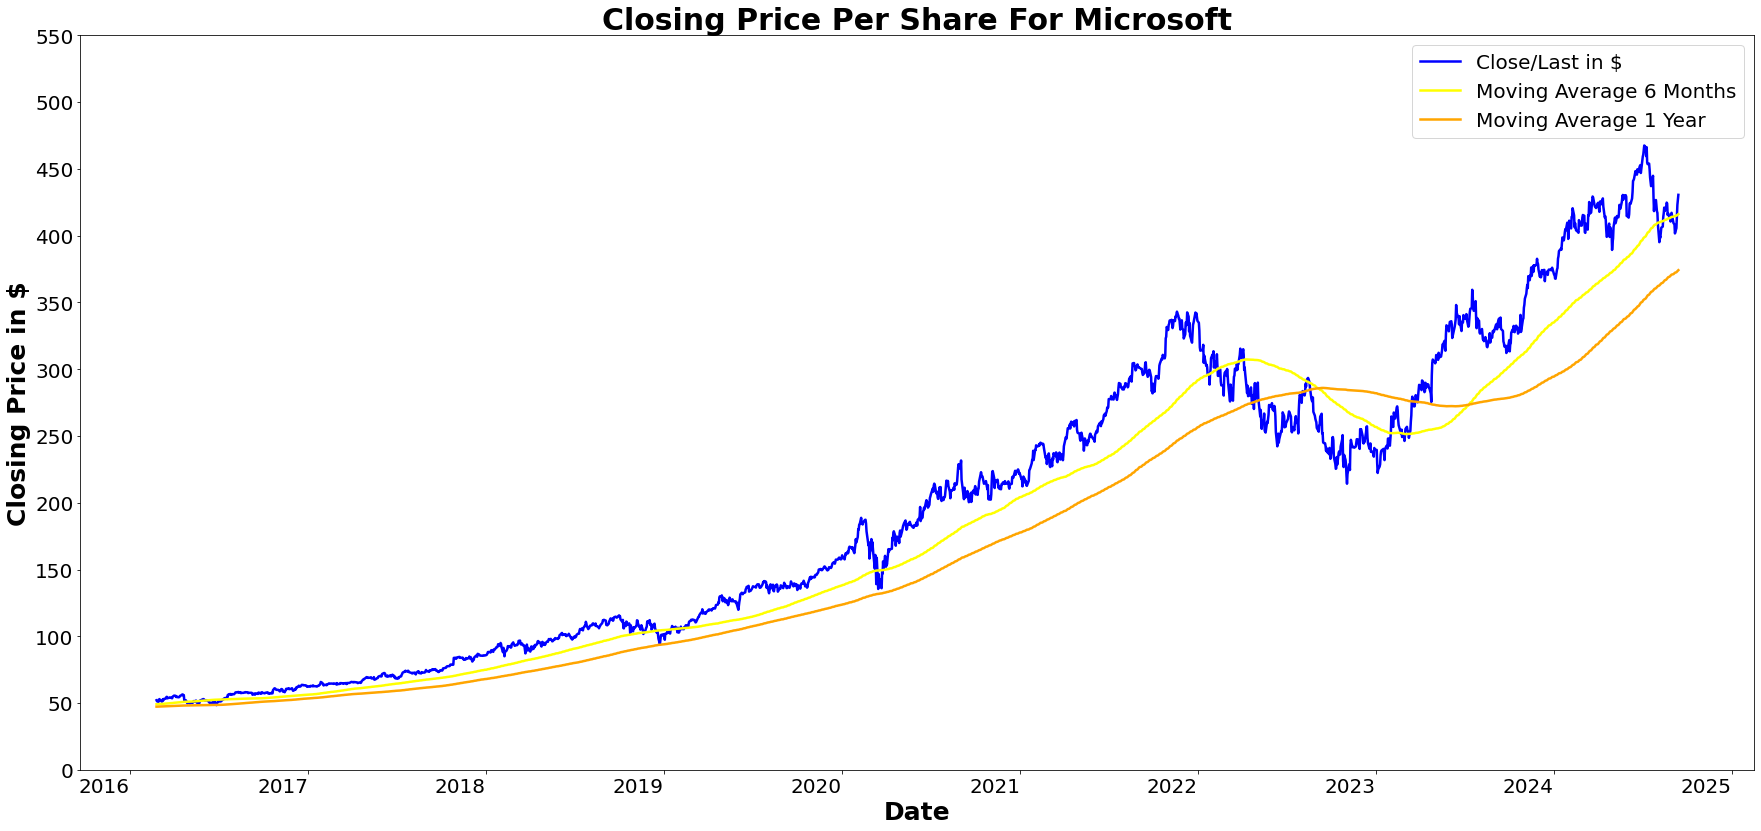

In [21]:
microsoft = plt.figure(figsize=(30,15))
moving_average_microsoft_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Microsoft', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

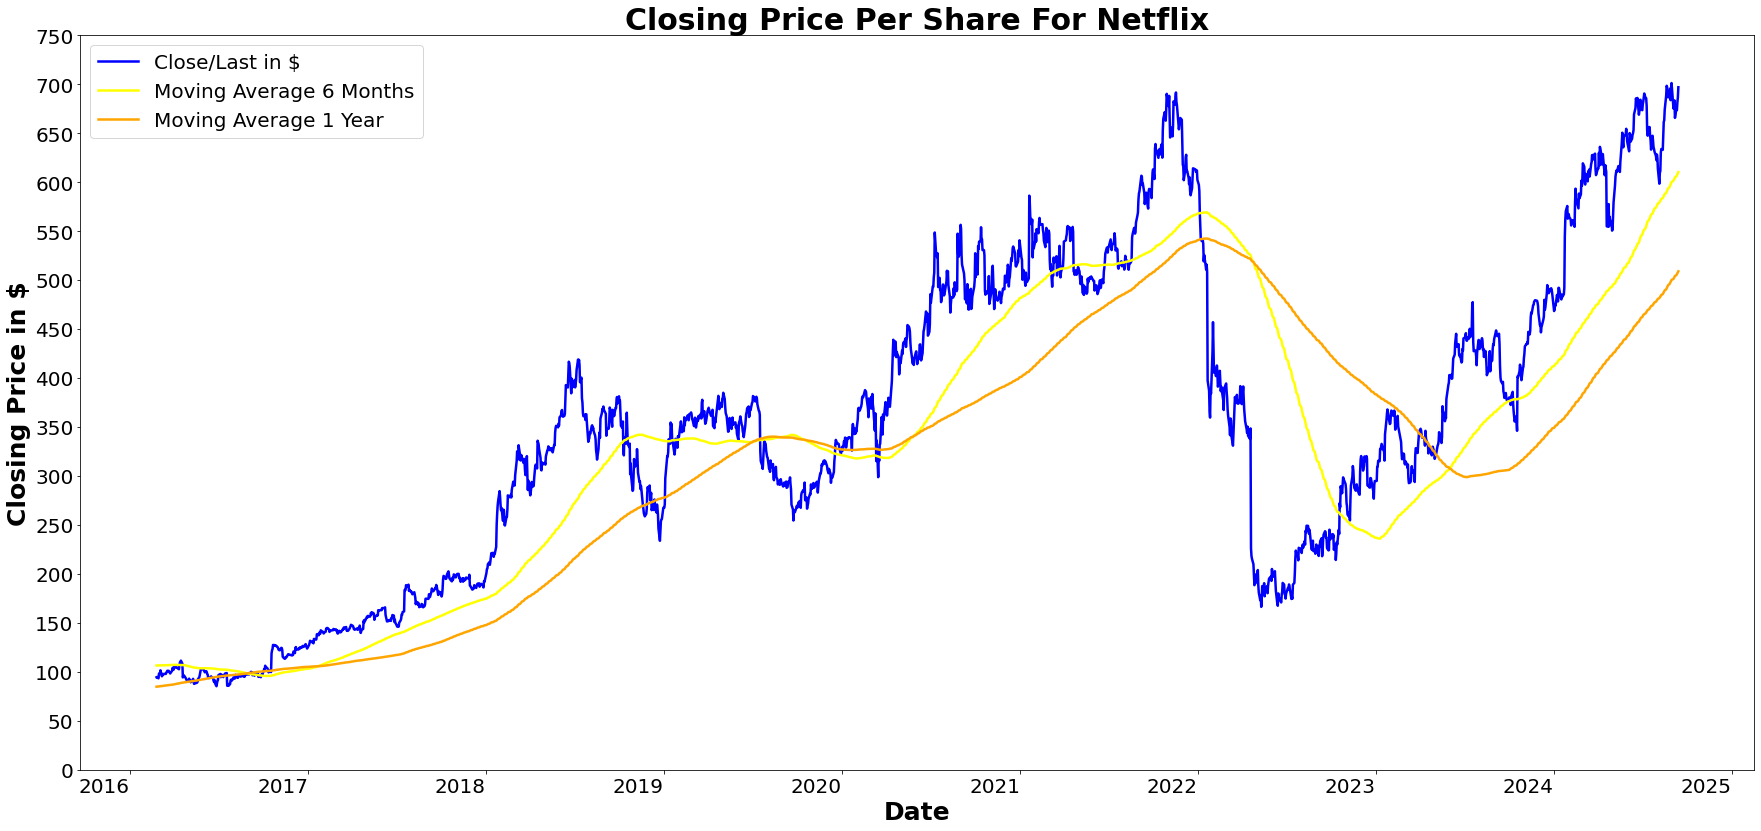

In [22]:
netflix = plt.figure(figsize=(30,15))
moving_average_netflix_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_netflix_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_netflix_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Netflix', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 800, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

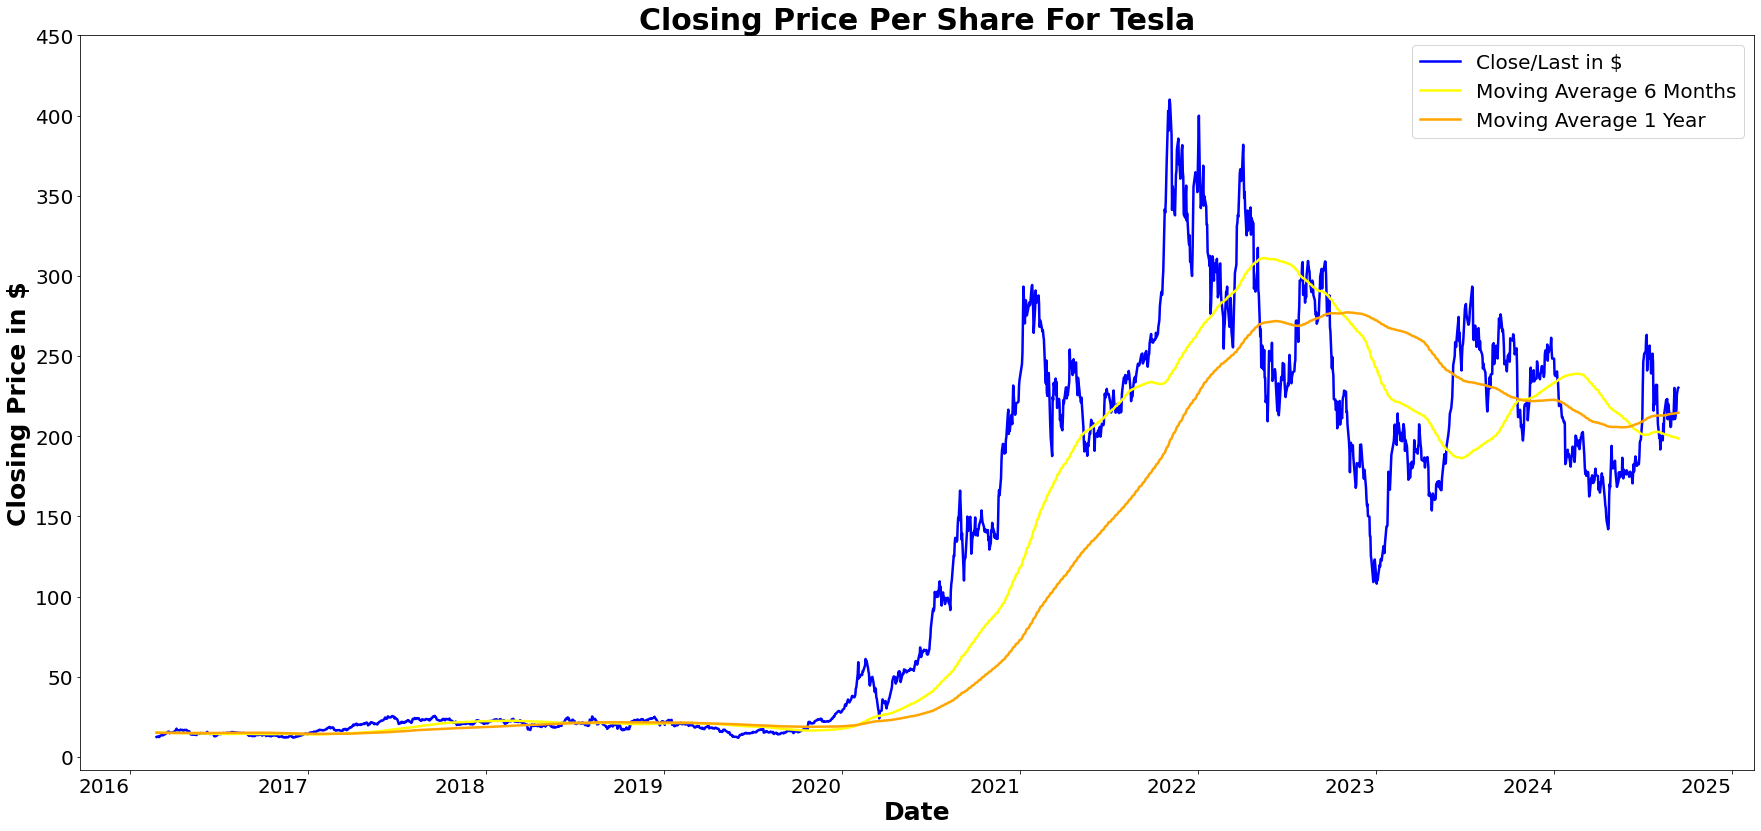

In [23]:
tesla = plt.figure(figsize=(30,15))
moving_average_tesla_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_tesla_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_tesla_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Tesla', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 500, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [24]:
shares_volume.savefig(os.path.join(path, 'Visualizations', 'shares_volume.png'))
six_stocks_ten_years.savefig(os.path.join(path, 'Visualizations', 'six_stocks_ten_years.png'))
amazon.savefig(os.path.join(path, 'Visualizations', 'amazon.png'))
apple.savefig(os.path.join(path, 'Visualizations', 'apple.png'))
meta.savefig(os.path.join(path, 'Visualizations', 'meta.png'))
microsoft.savefig(os.path.join(path, 'Visualizations', 'microsoft.png'))
netflix.savefig(os.path.join(path, 'Visualizations', 'netflix.png'))
tesla.savefig(os.path.join(path, 'Visualizations', 'tesla.png'))